<a href="https://colab.research.google.com/github/lwa01/229351-StatisticalLearning/blob/main/229351-LAB07%20%E0%B8%A2%E0%B8%B1%E0%B8%87%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B9%80%E0%B8%AA%E0%B8%A3%E0%B9%87%E0%B8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [224]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 05:23:14--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 05:23:14 (21.2 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [225]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [226]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'], # ต้องใส่  แปลว่า คอลลัมน์ชื่อไหนที่เก็บวันที่
                                        index_col='time', #ต้องใส่ คือ คอลลัมน์เเรกที่ใช้ index เก็บข้อมูล
                                        date_format='%Y-%m') #บอกว่า format ของเราเป็นยังไง เช่น ข้อมูลที่มาปีขี้นก่อนแล้วก็เดือน

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


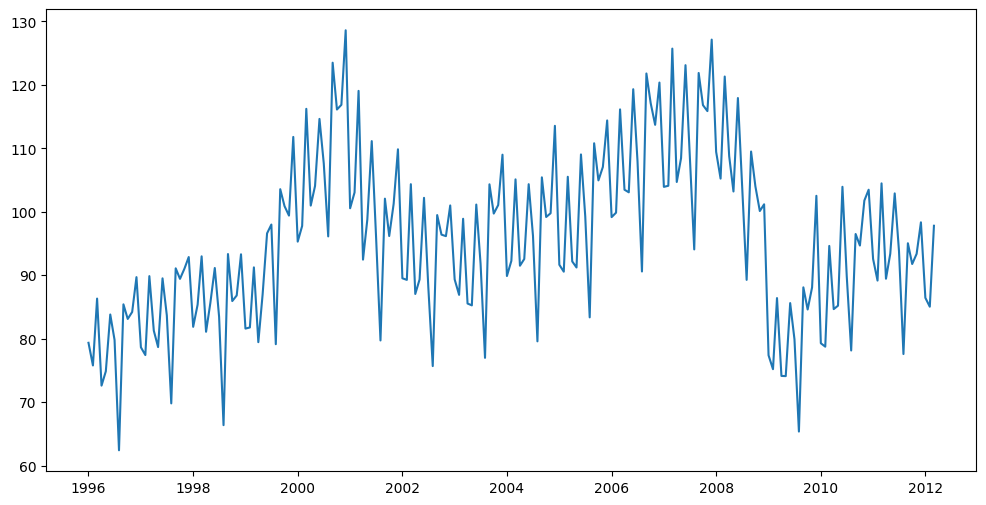

In [227]:
#plot ข้อมูลคอลลัมน์ value ขนาด 12*6 ขนาดใหญ่ และมียักเยอะเนื่องจากข้อมูลเป็นเดือน
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [228]:
# subsetting data at specified date
data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [229]:
data.loc['1996-01-01','value'] #ดึงข้อมูลวันใดวันหนึ่งออกมา ใช้ค่าที่เป็น value เท่านั้น
data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [230]:
# Add or change values

data.loc['2012-01-01','value'] = 86.5
data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.50


h# Moving average

In [231]:
# 5-MA
data['MA'] = data['value'].rolling(window=5,center=True).mean() # ต้องตั้ง center=True ด้วย
# 12-MA
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


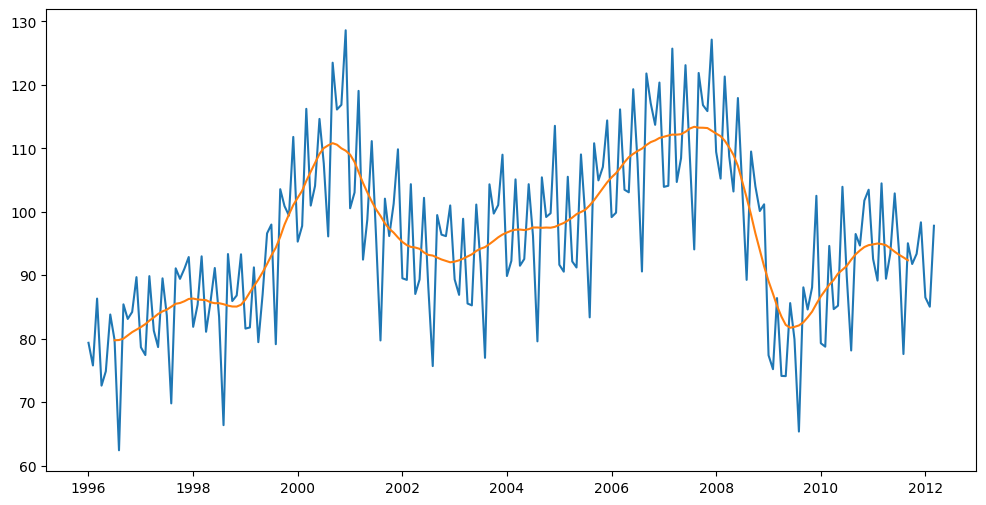

In [232]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

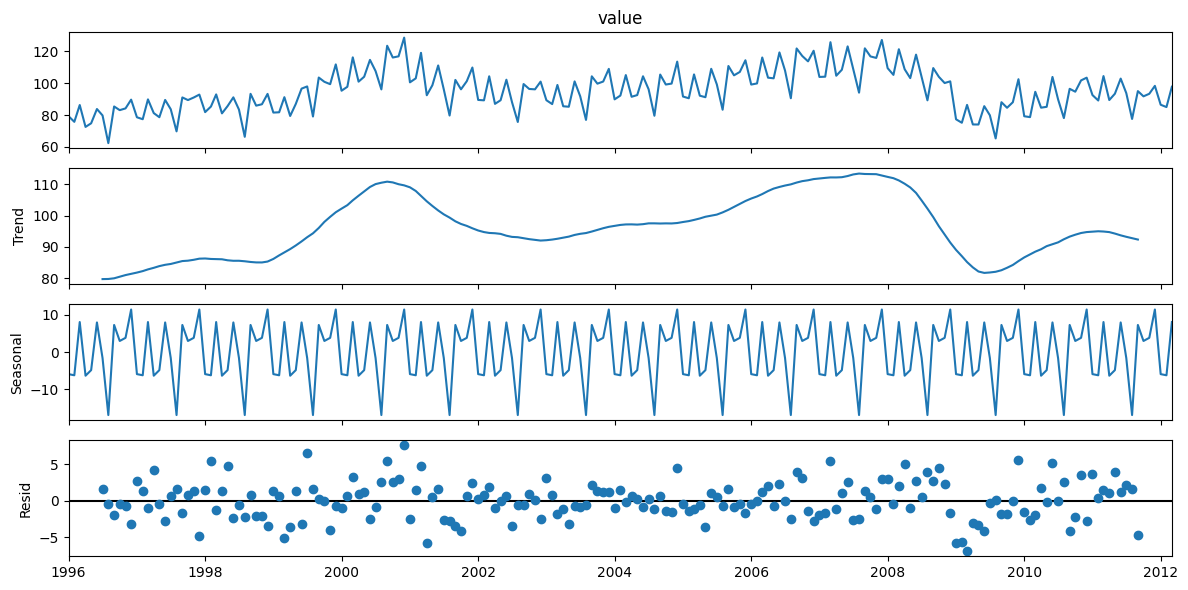

In [233]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',  #additive สามส่วนบวกกัน
                                period=12) #12 คือ sesonal 12 เดือน

result_add.plot();

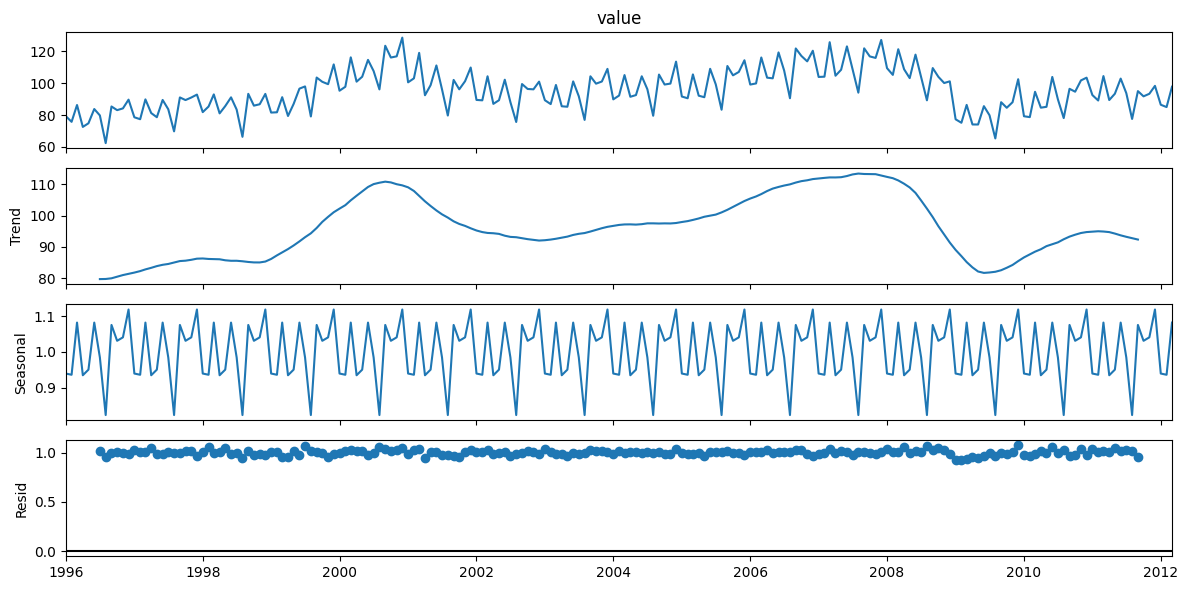

In [234]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',
                                period =12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [235]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887597
1996-02-01    -6.199208
1996-03-01     8.083236
1996-04-01    -6.314903
1996-05-01    -4.818403
                ...    
2011-11-01     3.847431
2011-12-01    11.447570
2012-01-01    -5.887597
2012-02-01    -6.199208
2012-03-01     8.083236
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.50
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [236]:
# 1.สร้างโมเดลเพื่อการทํานาย แบ่งข้อมูลออกเป็น 2 ส่วน
# training set
training_set = data.loc[:'2009-12-01']
print(training_set)
# test set
test_set = data.loc['2010-01-01':'2012-03-01']
print(test_set)

            Unnamed: 0   value         MA
time                                     
1996-01-01           1   79.35        NaN
1996-02-01           2   75.78        NaN
1996-03-01           3   86.32        NaN
1996-04-01           4   72.60        NaN
1996-05-01           5   74.86        NaN
...                ...     ...        ...
2009-08-01         164   65.36  82.087083
2009-09-01         165   88.09  82.577500
2009-10-01         166   84.60  83.358750
2009-11-01         167   88.09  84.260000
2009-12-01         168  102.52  85.486250

[168 rows x 3 columns]
            Unnamed: 0   value         MA
time                                     
2010-01-01         169   79.28  86.665417
2010-02-01         170   78.74  87.613333
2010-03-01         171   94.62  88.496250
2010-04-01         172   84.66  89.266667
2010-05-01         173   85.20  90.256667
2010-06-01         174  103.94  90.866667
2010-07-01         175   89.87  91.460417
2010-08-01         176   78.14  92.448333
2010-09-01

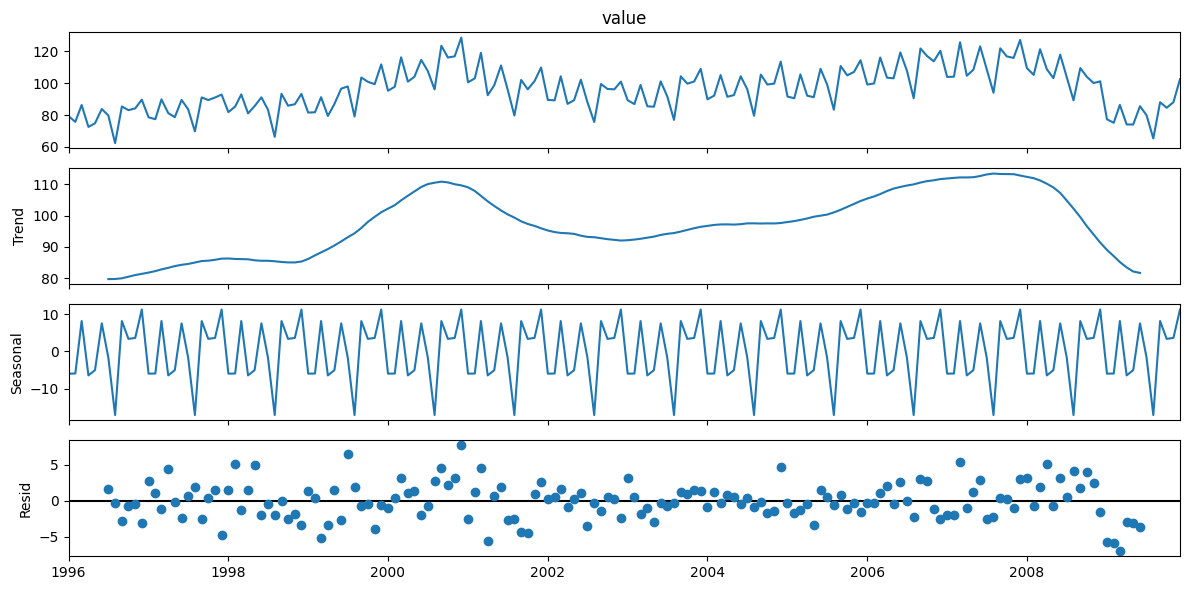

In [237]:
# 1.2 แยกส่วนประกอบ  training set
mpl.rc("figure", figsize=(12,6))
training_result_add = seasonal_decompose(training_set['value'], model='additive',period=12)
training_result_add.plot();

In [238]:
# 1.3 สร้าง time series ชุดใหม่ที่แสดงถึงค่าทํานายบน test set
# ดึงค่า T + R ของวันล่าสุดใน training set
testset_t = training_result_add.trend.dropna().iloc[-1]
testset_r = training_result_add.resid.dropna().iloc[-1]
testset_ = testset_t + testset_r

# หา seasonal ของ test set จาก training set 12 ค่า
testset_s = training_result_add.seasonal.iloc[-12:]

# ทํานายค่าบน test set
testset_ts = testset_s + testset_
print(testset_ts)

time
2009-01-01    72.071154
2009-02-01    72.099071
2009-03-01    86.240256
2009-04-01    71.594583
2009-05-01    73.015833
2009-06-01    85.610000
2009-07-01    76.416058
2009-08-01    60.918109
2009-09-01    86.235897
2009-10-01    81.435353
2009-11-01    81.701346
2009-12-01    89.346474
Name: seasonal, dtype: float64


In [239]:
# 2. คํานวณ rmse จากฟังก์ชัน
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  y_true = test_set
  y_pred = testset_ts
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

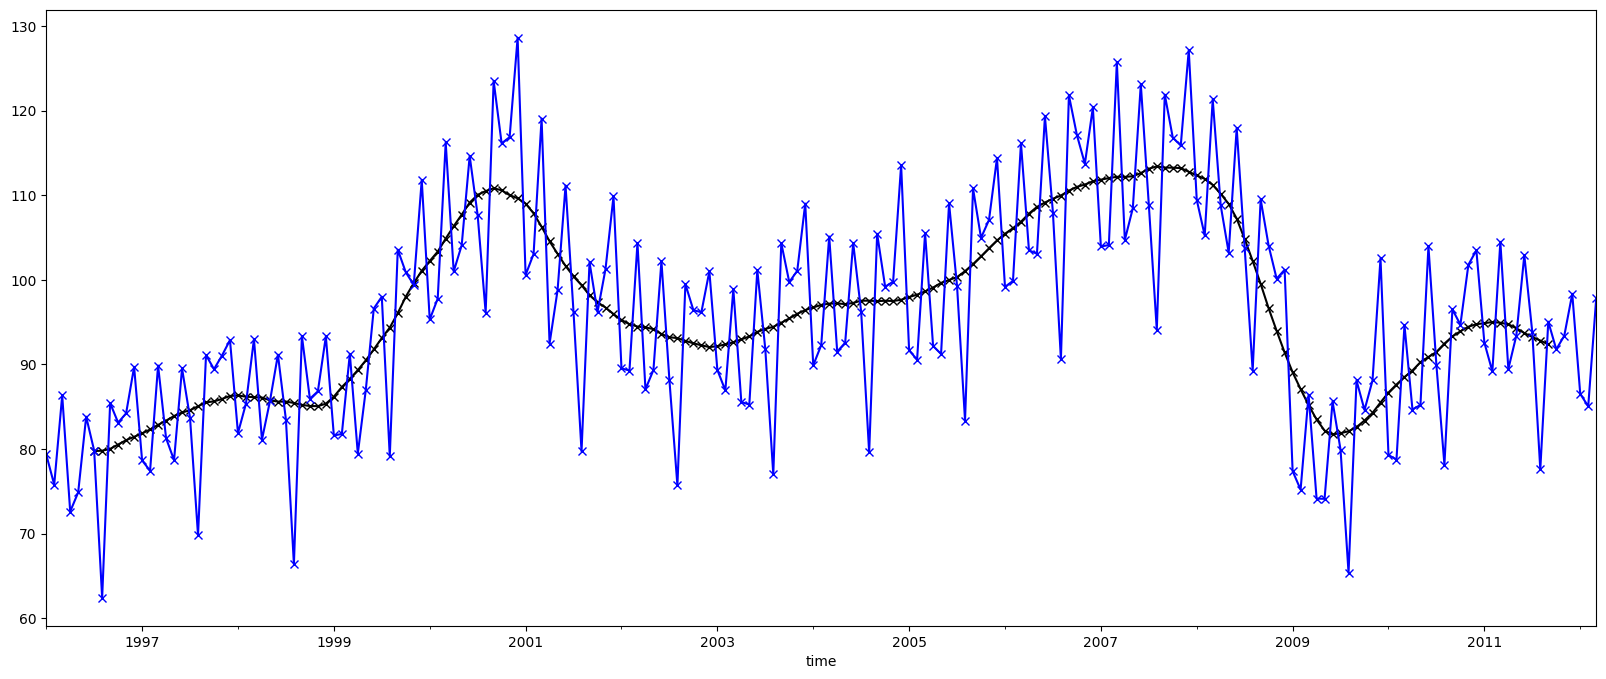

In [240]:
#ตัวอย่างการ plot กราฟ สองเส้น
ax1 = result_add.trend.plot(marker='x', color='black', figsize=(20,8))
ax2 = result_add.observed.plot(marker='x', color='blue',figsize=(20,8))